In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [5]:
df = pd.read_csv("Crop_recommendation.csv")

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.drop(columns=['label']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [9]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
categorized_df = df.groupby('label').value_counts()
pd.DataFrame(categorized_df)

count
label      N   P   K   temperature humidity  ph       rainfall         
apple      0   123 205 22.027754   92.961295 5.790993 121.134918      1
               133 200 23.672877   90.493557 5.708419 104.229803      1
           37  126 196 23.599973   90.975977 5.596449 107.172819      1
           35  131 203 22.427761   93.917224 5.893491 102.723074      1
               138 200 21.199095   90.808194 5.671306 103.683892      1
...                                                                 ...
watermelon 81  16  45  26.904357   86.254262 6.727468 59.759800       1
               6   55  24.889105   85.870591 6.110143 51.706991       1
           80  26  55  24.534426   88.989272 6.140099 49.116187       1
               16  46  25.504055   81.402974 6.940236 48.478333       1
           120 24  47  26.986037   89.413849 6.260839 58.548767       1

[2200 rows x 1 columns]

In [11]:
nitro_mx = df['N'].max()
crop_with_mx_N_df = df.loc[df['N'].idxmax()]
crop_with_mx_N = crop_with_mx_N_df['label']
print(f"Crop with maximum amount of Nitrogen need: {crop_with_mx_N}")
print(f"Maximum amount of Nitrogen needed is: {nitro_mx}\n")


phos_mx = df['P'].max()
crop_with_mx_P_df = df.loc[df['P'].idxmax()]
crop_with_mx_P = crop_with_mx_P_df['label']
print(f"Crop with maximum amount of Phosphorus need: {crop_with_mx_P}")
print(f"Maximum amount of Phosphorus needed is: {phos_mx}\n")


pota_mx = df['K'].max()
crop_with_mx_K_df = df.loc[df['K'].idxmax()]
crop_with_mx_K = crop_with_mx_K_df['label']
print(f"Crop with maximum amount of Potassium need: {crop_with_mx_K}")
print(f"Maximum amount of Potassium needed is: {pota_mx}\n")


temp_mx = df['temperature'].max()
crop_with_mx_temp_df = df.loc[df['temperature'].idxmax()]
crop_with_mx_temp = crop_with_mx_temp_df['label']
print(f"Crop with maximum amount of Temperature need: {crop_with_mx_temp}")
print(f"Maximum Temperature needed is: {temp_mx}\n")


humid_mx = df['humidity'].max()
crop_with_mx_humid_df = df.loc[df['humidity'].idxmax()]
crop_with_mx_humid = crop_with_mx_humid_df['label']
print(f"Crop with maximum amount of Humidity need: {crop_with_mx_humid}")
print(f"Maximum amount of Humidity needed is: {humid_mx}\n")


ph_mx = df['ph'].max()
crop_with_mx_PH_df = df.loc[df['ph'].idxmax()]
crop_with_mx_PH = crop_with_mx_PH_df['label']
print(f"Crop with maximum amount of Humidity need: {crop_with_mx_PH}")
print(f"Maximum amount of PH* needed is: {ph_mx}\n")

Crop with maximum amount of Nitrogen need: cotton
Maximum amount of Nitrogen needed is: 140

Crop with maximum amount of Phosphorus need: grapes
Maximum amount of Phosphorus needed is: 145

Crop with maximum amount of Potassium need: grapes
Maximum amount of Potassium needed is: 205

Crop with maximum amount of Temperature need: papaya
Maximum Temperature needed is: 43.67549305

Crop with maximum amount of Humidity need: coconut
Maximum amount of Humidity needed is: 99.98187601

Crop with maximum amount of Humidity need: mothbeans
Maximum amount of PH* needed is: 9.93509073



In [12]:
nitro_mn = df['N'].min()
print(f"Minimum amount of Nitrogen needed is: {nitro_mn}")


phos_mn = df['P'].min()
print(f"Minimum amount of Nitrogen needed is: {phos_mn}")

pota_mn = df['K'].min()
print(f"Minimum amount of Nitrogen needed is: {pota_mn}")

temp_mn = df['temperature'].min()
print(f"Minimum amount of Nitrogen needed is: {temp_mn}")

humid_mn = df['humidity'].min()
print(f"Minimum amount of Nitrogen needed is: {humid_mn}")

ph_mn = df['ph'].min()
print(f"Minimum amount of Nitrogen needed is: {ph_mn}")

Minimum amount of Nitrogen needed is: 0
Minimum amount of Nitrogen needed is: 5
Minimum amount of Nitrogen needed is: 5
Minimum amount of Nitrogen needed is: 8.825674745
Minimum amount of Nitrogen needed is: 14.25803981
Minimum amount of Nitrogen needed is: 3.504752314


In [13]:
categorized_df_mx = df.groupby('label').max()
categorized_df_mx

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,40,145,205,23.996862,94.920481,6.499227,124.983162
banana,120,95,55,29.908885,84.978492,6.490074,119.847970
blackgram,60,80,25,34.946616,69.961000,7.775306,74.915595
chickpea,60,80,85,20.995022,19.969789,8.868741,94.781896
coconut,40,30,35,29.869083,99.981876,6.470466,225.632366
coffee,120,40,35,27.923744,69.948073,7.493192,199.473564
cotton,140,60,25,25.992374,84.876690,7.994680,99.931008
grapes,40,145,205,41.948657,83.983517,6.499605,74.915062
jute,100,60,45,26.985822,89.891065,7.488014,199.836291


In [14]:
categorized_df_mn = df.groupby('label').min()
categorized_df_mn

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,0,120,195,21.036527,90.025751,5.514253,100.117344
banana,80,70,45,25.010185,75.031933,5.505394,90.109781
blackgram,20,55,15,25.097374,60.065349,6.500145,60.417903
chickpea,20,55,75,17.024985,14.258040,5.988993,65.113656
coconut,0,5,25,25.008724,90.017345,5.501580,131.090008
coffee,80,15,25,23.059519,50.045570,6.020947,115.156401
cotton,100,35,15,22.000851,75.005393,5.801048,60.653817
grapes,0,120,195,8.825675,80.016394,5.510925,65.010953
jute,60,35,35,23.094338,70.882596,6.002525,150.235524


In [15]:
categorized_df_mean = df.groupby('label').mean()
categorized_df_mean

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [16]:
categorized_df_mn = categorized_df_mn.reset_index()
categorized_df_mn = categorized_df_mn.rename(columns={'index': 'label'})

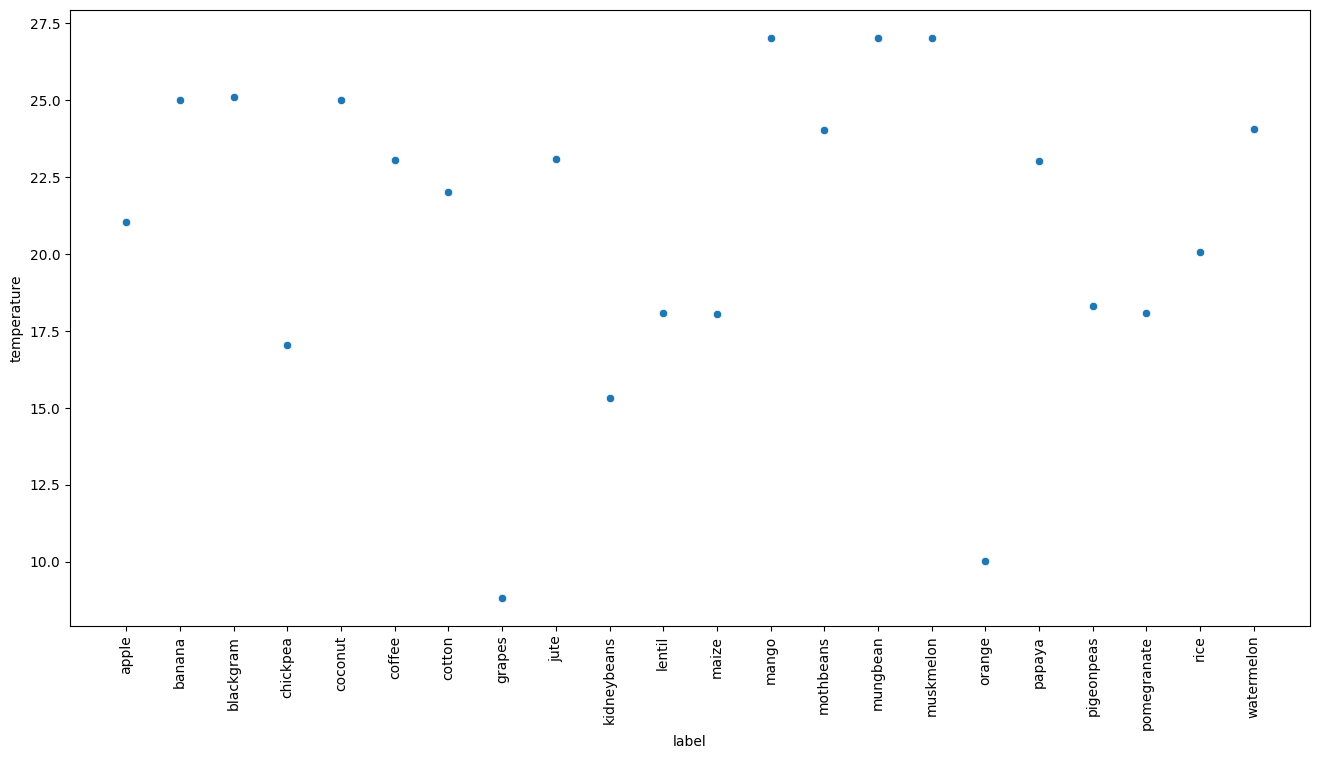

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=categorized_df_mn['label'], y=categorized_df_mn['temperature'])
a = plt.xticks(rotation=90)

<Axes: >

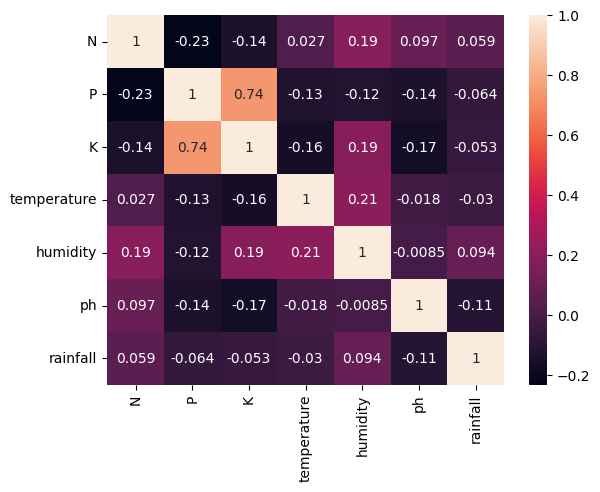

In [18]:
num_df = df.drop(columns=['label'])
sns.heatmap(num_df.corr(), annot=True)

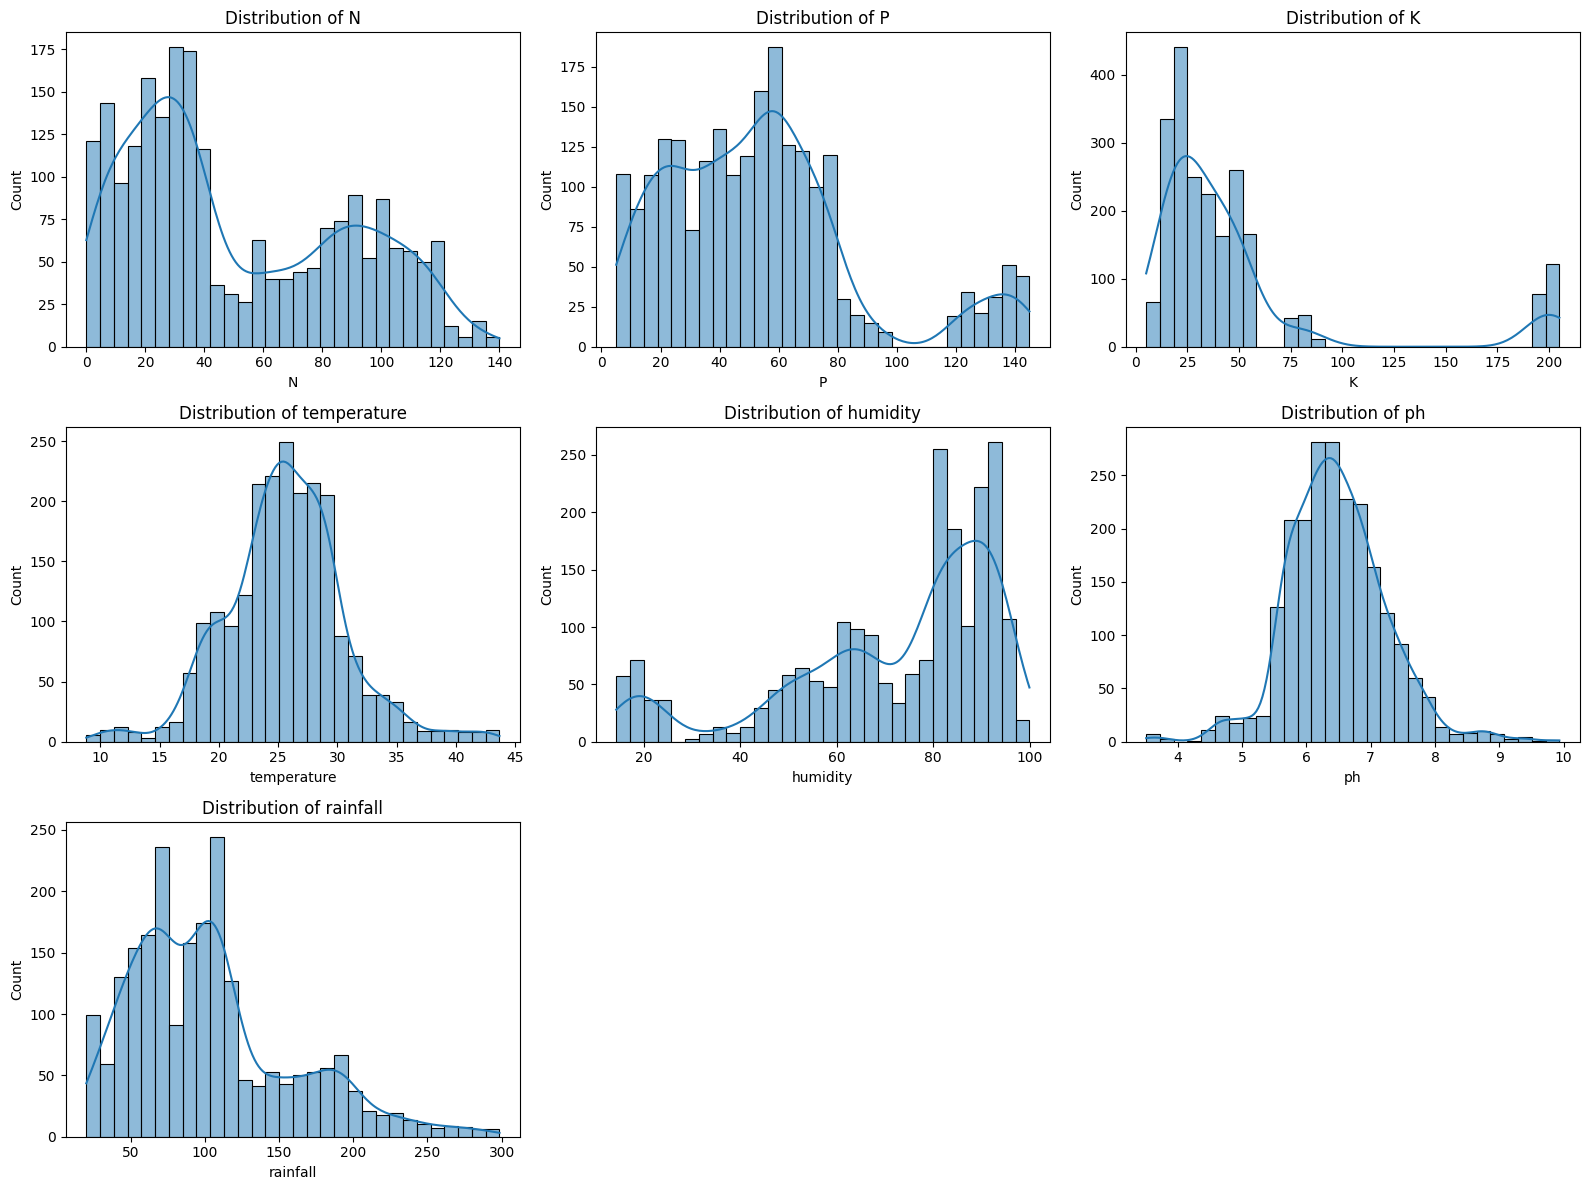

In [19]:
# List of features to plot
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create a histogram for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

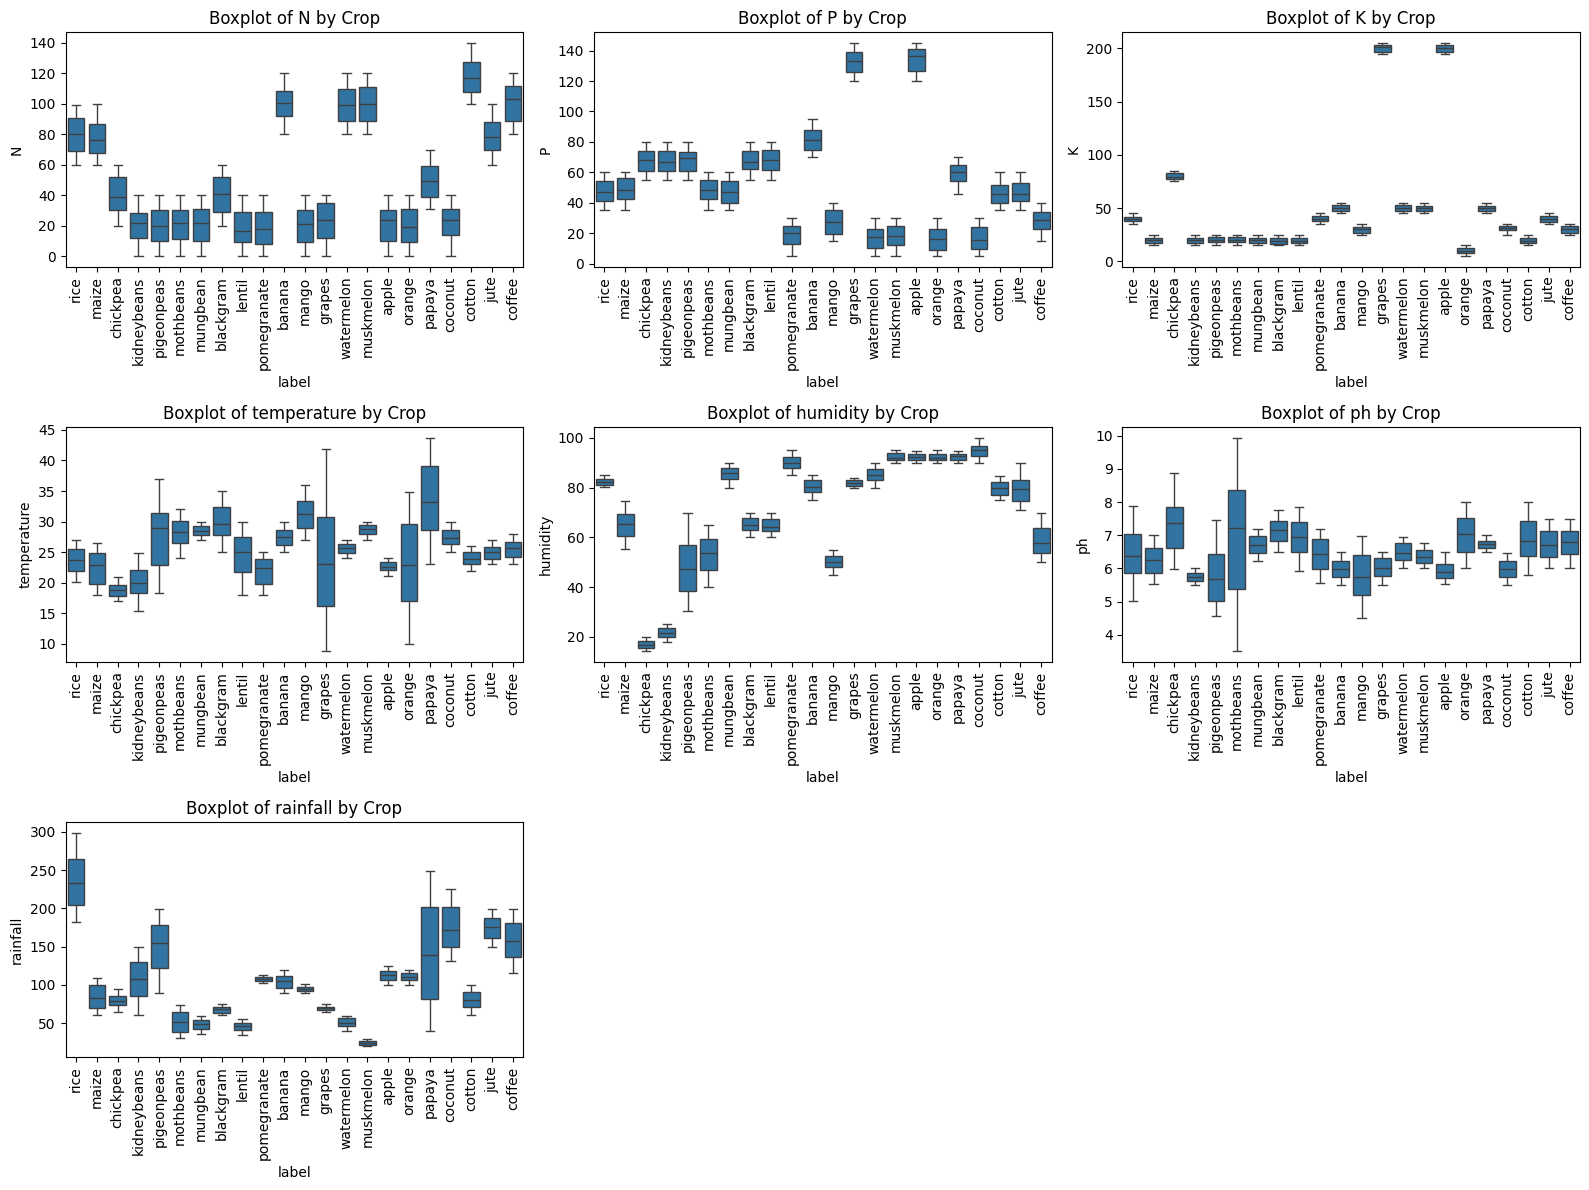

In [20]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create boxplots for each feature grouped by crop label
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Crop')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

In [21]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the label column
df['label_encoded'] = le.fit_transform(df['label'])

df[['label', 'label_encoded']]

,label,label_encoded
0,rice,20
1,rice,20
2,rice,20
3,rice,20
4,rice,20
...,...,...
2195,coffee,5
2196,coffee,5
2197,coffee,5
2198,coffee,5


In [26]:
# Features and target
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC()
}


# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Print the results
for model_name, accuracy in results.items():
    print(f'{model_name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.9470
Random_Forest Accuracy: 0.9909
SVM Accuracy: 0.9636


       Feature  Importance
6     rainfall    0.237409
4     humidity    0.206679
2            K    0.168173
1            P    0.159859
0            N    0.098293
3  temperature    0.075658
5           ph    0.053930


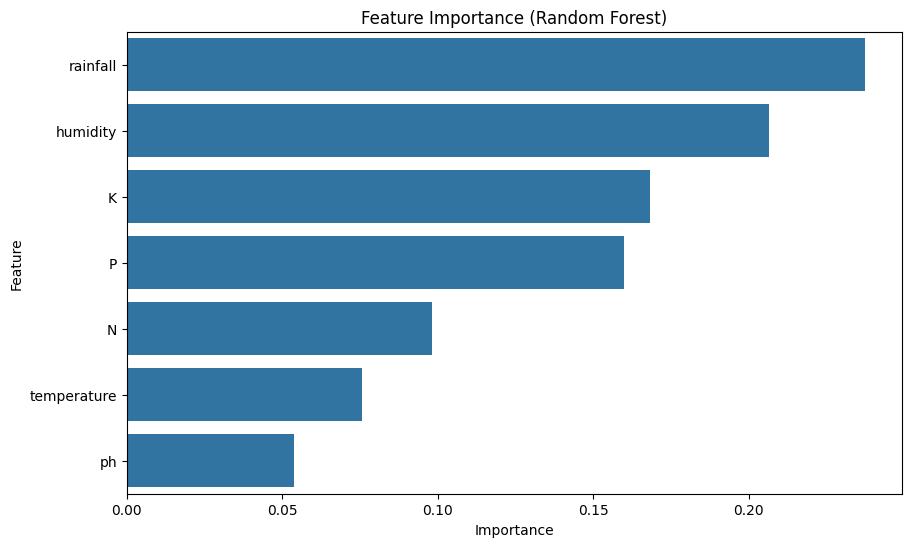

In [27]:
# Get feature importances
rf = models["Random_Forest"]

importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()